<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Necessary Libraries**

In [609]:
# Installing required libraries
# !pip install --upgrade tensorflow
# !pip install fancyimpute scikit-learn pandas

# **Importing Necessary Libraries**

In [610]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import random
import pickle
import joblib

# **Mounting the Google Drive**

In [611]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [612]:
# Loading the dataset with the proper delimiter (semicolon)
data = pd.read_excel('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/IMPORT STATISTICS - 2023.xlsx')

In [613]:
# Displaying the first few rows of the data
data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Unknown,2023.0,JANUARY,280110,BANGLADESH,Kg.,131600.0,13877114.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
1,Unknown,2023.0,JANUARY,280110,INDIA,Kg.,37800.0,3924989.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
2,Unknown,2023.0,JANUARY,280110,MALAYSIA,Kg.,12090.0,5390772.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
3,Unknown,2023.0,FEBRUARY,280110,BANGLADESH,Kg.,25200.0,3089445.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
4,Unknown,2023.0,FEBRUARY,280110,INDIA,Kg.,75599.0,6939860.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine


# **Exploratary Data Analysis**

In [614]:
# Displaying information
print("Displaying data information")
data.info()

Displaying data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   MONTH           292 non-null    object 
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1038 non-null   object 
 5   UNIT            1042 non-null   object 
 6   QUANTITY        1039 non-null   float64
 7   VALUE_RS        292 non-null    float64
 8   DESCRIPTION_01  1042 non-null   object 
 9   DESCRIPTION_02  1042 non-null   object 
 10  DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 89.7+ KB


## **Identifying Categorical and Numerical Features**

In [615]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [616]:
# Displaying the Categorical and the Numerical columns'
print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['IMPORTER', 'MONTH', 'COUNTRY', 'UNIT', 'DESCRIPTION_01',
       'DESCRIPTION_02', 'DESCRIPTION_03'],
      dtype='object')

Numerical Columns:
Index(['YEAR', 'HSCODE', 'QUANTITY', 'VALUE_RS'], dtype='object')


**Since 'HSCODE' column has been misintepreted as an int64 data type column due to the unavailability of data, reassigning it has an object type column.**

In [617]:
# Converting 'IMPORTER' and 'HSCODE' columns to string type
data['HSCODE'] = data['HSCODE'].astype(str)

# Displaying the HSCODE column data type
print("Data Type of HSCODE Columns:")
print(data[['HSCODE']].dtypes)

Data Type of HSCODE Columns:
HSCODE    object
dtype: object


### **Categorical Features**

In [618]:
# List of categorical features
categorical_features = ['IMPORTER', 'MONTH', 'COUNTRY', 'HSCODE', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03']

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- IMPORTER
- MONTH
- COUNTRY
- HSCODE
- UNIT
- DESCRIPTION_01
- DESCRIPTION_02
- DESCRIPTION_03

Data Type of Categorical Features:
IMPORTER          object
MONTH             object
COUNTRY           object
HSCODE            object
UNIT              object
DESCRIPTION_01    object
DESCRIPTION_02    object
DESCRIPTION_03    object
dtype: object


**Unique values and their counts relevant to each categorical column**

In [619]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
U.S.A.       1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
UNIT
Kg     750
Kg.    112
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic comp

**Categorical columns with null values and their relevant counts**

In [620]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:
MONTH: 750
COUNTRY: 4


**Categorical columns with 'Unknown' values and their relevant counts**

In [621]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:
IMPORTER: 1042


## **Numerical Features**

**Since 'Year' column has been misintepreted as a float64 data type column reassigning it as a int64 type column**

In [622]:
# Converting the 'Year' column to int64 data type
# data['YEAR'] = data['YEAR'].astype(int)

# Displaying the data type of the 'Year' column
# print("Data Type of 'Year' Column:")
# print(data['YEAR'].dtype)

**The conversion cannot be done since the column contains missing values (both N/A and null values)**

In [623]:
# List of numerical features
numerical_features = ['YEAR', 'QUANTITY', 'VALUE_RS']

# Displaying the numerical features
print("Numerical Features:")
for feature in numerical_features:
    print(f"- {feature}")

# Display the data type of the numerical features
print("\nData Type of Numerical Features:")
print(data[numerical_features].dtypes)

Numerical Features:
- YEAR
- QUANTITY
- VALUE_RS

Data Type of Numerical Features:
YEAR        float64
QUANTITY    float64
VALUE_RS    float64
dtype: object


**Unique values and their counts in the numerical columns**

In [624]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

YEAR
2016.0    180
2023.0    112
Name: count, dtype: int64
 
QUANTITY
1000.0     55
1.0        49
16200.0    40
5.0        31
27.0       28
           ..
204.0       1
23200.0     1
22820.0     1
22560.0     1
19050.0     1
Name: count, Length: 359, dtype: int64
 
VALUE_RS
0.40           4
53.79          3
188.55         3
0.20           3
21.15          2
              ..
350598.00      1
2213950.00     1
10318355.00    1
24988179.00    1
0.68           1
Name: count, Length: 263, dtype: int64
 


**Numerical columns with null values and their relevant counts**

In [625]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_cols:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:
YEAR: 750
QUANTITY: 3
VALUE_RS: 750


# **Data Preprocessing**

## **Data Cleaning**

In [626]:
# Step 1: Removing whitespaces from the object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [627]:
# Step 2: Removing unnecessary full stops(".") from the categorical columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.str.replace('.', ''))

In [628]:
# Step 3: Removing unnecessary special characters and trailing spaces from the 'DESCRIPTION_03' column
# Removing the leading hyphen
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.lstrip('-')

# Removing trailing spaces
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.strip()

In [629]:
# Step 4: Removing trailing spaces for the entire 'DESCRIPTION_02' column
data['DESCRIPTION_02'] = data['DESCRIPTION_02'].str.strip()

In [630]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
USA          1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
UNIT
Kg     862
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic compounds of pr

In [631]:
# Step 5: Converting all the values in the 'COUNTRY' and the 'UNIT' columns to uppercase values
data['COUNTRY'] = data['COUNTRY'].str.upper()
data['UNIT'] = data['UNIT'].str.upper()

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [632]:
# Step 6: Converting the 'KGS' values in the 'Unit' columns to 'KG'
data.loc[data['UNIT'] == 'KGS', 'UNIT'] = 'KG'

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [633]:
# Step 7: Handling the HSCODES

# Checking the length of the HSCODES and determining the maximum length
data['HSCODE_LENGTH'] = data['HSCODE'].apply(len)
max_length = data['HSCODE_LENGTH'].max()

# Padding HSCODE values with trailing zeros to match the maximum length
data['HSCODE'] = data['HSCODE'].apply(lambda x: x.ljust(max_length, '0'))

# Dropping the helper column 'HSCODE_LENGTH' as it's no longer needed
data.drop(columns=['HSCODE_LENGTH'], inplace=True)

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [634]:
# Step 8: Handling the 'COUNTRY' Column

# Replacing specific country names
data['COUNTRY'] = data['COUNTRY'].replace({
    'United States': 'USA',
    'United States of America': 'USA',
    'United Kingdom': 'UK',
    'Korea, Republic of': 'South Korea'
})

print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [635]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
VIETNAM                 299
RUSSIA                  109
KENYA                    71
BELGIUM                  59
SOUTH KOREA              58
UKRAINE                  58
GERMANY                  53
COLOMBIA                 29
INDIA                    29
CHINA                    28
BANGLADESH               27
SLOVENIA                 24
UNITED STATES            23
MALAYSIA                 19
US VIRGIN ISLANDS        19
URUGUAY                  18
UNITED KINGDOM           17
THAILAND                 17
JAPAN                    10
SRI LANKA                 8
GERMENY                   6
CAMBODIA                  5
ISRAEL           

## **Handling Missing Values**

**Handling missing values in the categorical columns**

**Replacing all the missing values with 'Unknown'**

In [636]:
# Step 9: Handling missing values in the categorical columns

# Replacing all the missing values in the categorical columns with 'Unknown' for imputation
data[categorical_features] = data[categorical_features].fillna('Unknown')

**Checking for any missing values which is left behind when replacing with 'Unkown'**

In [637]:
# Verifying the changes after replacing the missing values with 'Unknown'
print("Checking for any missing values left behind after replacing with 'Unknown':")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} missing values")
    else:
        print(f"{col}: No missing values")
    print(" ")

Checking for any missing values left behind after replacing with 'Unknown':
IMPORTER: No missing values
 
MONTH: No missing values
 
COUNTRY: No missing values
 
HSCODE: No missing values
 
UNIT: No missing values
 
DESCRIPTION_01: No missing values
 
DESCRIPTION_02: No missing values
 
DESCRIPTION_03: No missing values
 


In [638]:
# Handling the 'UNknown' values in the 'COUNTRY' column using the mode
mode_country = data['COUNTRY'].mode()[0]
data['COUNTRY'] = data['COUNTRY'].replace('Unknown', mode_country)

In [639]:
# Displaying dataset information post-imputation
print("\nDataset information after categorical imputation:")
data.info()


Dataset information after categorical imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   MONTH           1042 non-null   object 
 3   HSCODE          1042 non-null   object 
 4   COUNTRY         1042 non-null   object 
 5   UNIT            1042 non-null   object 
 6   QUANTITY        1039 non-null   float64
 7   VALUE_RS        292 non-null    float64
 8   DESCRIPTION_01  1042 non-null   object 
 9   DESCRIPTION_02  1042 non-null   object 
 10  DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), object(8)
memory usage: 89.7+ KB


In [640]:
# Displaying the unique values in the 'IMPORTER' column
unique_importers = data['IMPORTER'].unique()
print("Unique Importers:")
print(unique_importers)

Unique Importers:
['Unknown']


In [641]:
# Display the unique values in the 'YEAR' column
unique_years = data['MONTH'].unique()
print("Unique MONTH:")
print(unique_years)

Unique MONTH:
['JANUARY' 'FEBRUARY' 'MARCH' 'APRIL' 'MAY' 'JUNE' 'JULY' 'AUGUST'
 'SEPTEMBER' 'OCTOBER' 'NOVEMBER' 'DECEMBER' 'Unknown']


In [642]:
# Display unique values in the 'COUNTRY' column
unique_countries = data['COUNTRY'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['BANGLADESH' 'INDIA' 'MALAYSIA' 'AUSTRIA' 'CHINA' 'USA' 'SOUTH KOREA'
 'THAILAND' 'GERMENY' 'CANADA' 'DENMARK' 'UK' 'JAPAN' 'PAKISTAN'
 'NETHERLANDS (HOLAND)' 'BELGIUM' 'SINGAPORE' 'SPAIN' 'FRANCE' 'GERMANY'
 'ISRAEL' 'CHILE' 'SWITZERLAND' 'UNITED STATES' 'TURKMENISTAN'
 'KOREA,REPUBLIC OF' 'UNITED KINGDOM' 'TAIWAN' 'RUSSIA' 'VIETNAM'
 'US VIRGIN ISLANDS' 'KENYA' 'UKRAINE' 'URUGUAY' 'COLOMBIA' 'INDONESIA'
 'KAZAKHSTAN' 'CAMBODIA' 'MEXICO' 'SLOVENIA' 'ROMANIA' 'SLOVAKIA' 'EGYPT'
 'SAUDI ARABIA' 'ITALY' 'UNITED ARAB EMIRATES' 'NIGERIA' 'SOUTH AFRICA'
 'SRI LANKA' 'ARGENTINA' 'BRAZIL' 'GEORGIA']


In [643]:
# Display unique values in the 'HSCODE' column
unique_hscodes = data['HSCODE'].unique()
print("Unique HSCodes:")
print(unique_hscodes)

Unique HSCodes:
['2801100000' '2808000000' '2837110000' '2837190000' '2847000000'
 '2808001000' '2801200000' '2801302000' '2837209000' '2837191000'
 '2837202000' '2837199000' '2801200001' '2801200002' '2801200003'
 '2801200004' '2801200005' '2801200006' '2801200007' '2801200008'
 '2801200009' '2801200010' '2801200011' '2801200012' '2801200013'
 '2801200014' '2801200015' '2801200016' '2801200017' '2801200018'
 '2801200019' '2801200020' '2801200021' '2801200022' '2801200023'
 '2801200024' '2801200025' '2801200026' '2801200027' '2801200028'
 '2801200029' '2801200030' '2801200031' '2801200032' '2801200033'
 '2801200034' '2801200035' '2801200036' '2801200037' '2801200038'
 '2801200039' '2801200040' '2801200041' '2801200042' '2801200043'
 '2801200044' '2801200045' '2801200046' '2801200047' '2801200048'
 '2801200049' '2801200050' '2801200051' '2801200052' '2801200053'
 '2801200054' '2801200055' '2801200056' '2801200057' '2801200058'
 '2801200059' '2801200060' '2801200061' '2801200062' '280120

In [644]:
# Display the unique values in the 'UNIT' column
unique_units = data['UNIT'].unique()
print("Unique Units:")
print(unique_units)

Unique Units:
['KG' 'LTR' 'PCS' 'NOS' 'GMS' 'MTS' 'DRM']


In [645]:
# Displaying the unique values in the 'DESCRIPTION_01' column
unique_descriptions_01 = data['DESCRIPTION_01'].unique()
print("Unique Descriptions_01:")
print(unique_descriptions_01)

Unique Descriptions_01:
['Inorganic chemicals; Organic or inorganic compounds of precious metals, of rare earth metals, of radioactive elements or of isotopes'
 'Fertilizers']


In [646]:
# Displaying the unique values in the 'DESCRIPTION_02' column
unique_descriptions_02 = data['DESCRIPTION_02'].unique()
print("Unique Descriptions_02:")
print(unique_descriptions_02)

Unique Descriptions_02:
['Fluorine, chlorine, bromine and iodine'
 'Nitric acid; sulphonitric acids'
 'Cyanides, cyanide oxides and complex cyanides'
 'Hydrogen peroxide, whether or not solidified with urea'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


In [647]:
# Displaying the unique values in the 'DESCRIPTION_03' column
unique_descriptions_03 = data['DESCRIPTION_03'].unique()
print("Unique Descriptions_03:")
print(unique_descriptions_03)

Unique Descriptions_03:
['Chlorine' 'Nitric acid; sulphonitric acids'
 'Cyanides and cyanide oxides : Of sodium'
 'Cyanides and cyanide oxides : Other'
 'Hydrogen peroxide, whether or not solidified with urea' 'Iodine'
 'Bromine'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


# **Data Encoding**

In [648]:
# Step 10: Encoding the Categorical Columns

# List of categorical columns to encode (excluding 'DESCRIPTION_03' which will be handled separately)
encoding_columns = ['IMPORTER', 'MONTH', 'COUNTRY', 'HSCODE', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02']

# Creating a label encoder object
label_encoder = LabelEncoder()

# Encoding and saving columns
for col in encoding_columns:
    # Encoding the column
    data[col] = label_encoder.fit_transform(data[col])

    # If the column is not one of the specific columns, save the encoder
    if col not in ['IMPORTER']:
        with open(f'encoded_{col}.pkl', 'wb') as f:
            pickle.dump(label_encoder, f)
        print(f"Encoded column: {col} saved successfully")
    else:
        print(f"Encoded column: {col}, but encoder not saved.")

# Separate encoding for 'DESCRIPTION_03'
description_03_encoder = LabelEncoder()
data['ENCODED_DESCRIPTION_03'] = description_03_encoder.fit_transform(data['DESCRIPTION_03'])

# Saving the encoder for 'DESCRIPTION_03'
with open('encoded_DESCRIPTION_03.pkl', 'wb') as f:
    pickle.dump(description_03_encoder, f)

print("Encoded column: DESCRIPTION_03 saved successfully")

Encoded column: IMPORTER, but encoder not saved.
Encoded column: MONTH saved successfully
Encoded column: COUNTRY saved successfully
Encoded column: HSCODE saved successfully
Encoded column: UNIT saved successfully
Encoded column: DESCRIPTION_01 saved successfully
Encoded column: DESCRIPTION_02 saved successfully
Encoded column: DESCRIPTION_03 saved successfully


In [649]:
# Displaying the categorical columns after the encoding
print("Categorical columns after encoding:")
print(data[encoding_columns])

Categorical columns after encoding:
      IMPORTER  MONTH  COUNTRY  HSCODE  UNIT  DESCRIPTION_01  DESCRIPTION_02
0            0      4        2       0     2               1               3
1            0      4       16       0     2               1               3
2            0      4       24       0     2               1               3
3            0      3        2       0     2               1               3
4            0      3       16       0     2               1               3
...        ...    ...      ...     ...   ...             ...             ...
1037         0     12       36      75     2               1               4
1038         0     12       36      75     2               1               4
1039         0     12       44      78     2               1               4
1040         0     12       44      78     2               1               4
1041         0     12       36      75     2               1               4

[1042 rows x 7 columns]


**Handling missing values in the 'MONTH' column using the K-NN Imputer for the efficient handling of the missing values**

In [650]:
# Imputing the 'MONTH' column with K-NN Imputer

# Initialize the KNNImputer with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Applying the imputation to the 'MONTH' column
data['MONTH'] = knn_imputer.fit_transform(data[['MONTH']])

**Handling the missing values in the 'IMPORTER' column after handling the missing values in the numerical coumns since all the values contained within the 'IMPORTER' column are 'Unknown' values and using K-Means clustering crucially expect the intepretation of the 'YEAR' column to be handled first.**

## **Handling missing values in the numerical columns**

**Using Multiple Imputation to handle the missing values in the numerical columns since the nature of the missing values in each numerical column varies from one another.**

**Using K-NN Imputaion to efficiently capture the small missing values and the captures local patterns in the 'Quantity' coulmn**

In [651]:
# Step 11: Handling missing values in the numerical columns

# KNN Imputation for 'QUANTITY'
knn_imputer = KNNImputer(n_neighbors=5)
data[['QUANTITY']] = knn_imputer.fit_transform(data[['QUANTITY']])

**Using Predictive Imputaion to capture the complex relationships.**

In [652]:
# Preparing the data, using the separately encoded 'ENCODED_DESCRIPTION_03' and ignoring 'DESCRIPTION_03'
missing_value_rs = data[data['VALUE_RS'].isnull()]
non_missing_value_rs = data[data['VALUE_RS'].notnull()]

# Dropping the 'VALUE_RS' and 'DESCRIPTION_03', use 'ENCODED_DESCRIPTION_03' instead
X_value_rs = non_missing_value_rs.drop(columns=['VALUE_RS', 'DESCRIPTION_03'])
X_value_rs['ENCODED_DESCRIPTION_03'] = non_missing_value_rs['ENCODED_DESCRIPTION_03']

# Considering the 'VALUE_RS' as the target variable
y_value_rs = non_missing_value_rs['VALUE_RS']

# Training Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_value_rs, y_value_rs)

# Preparing the missing data using 'ENCODED_DESCRIPTION_03' for prediction
X_missing_value_rs = missing_value_rs.drop(columns=['VALUE_RS', 'DESCRIPTION_03'])
X_missing_value_rs['ENCODED_DESCRIPTION_03'] = missing_value_rs['ENCODED_DESCRIPTION_03']

# Predicting missing 'VALUE_RS' values and impute them back into the original dataframe
data.loc[data['VALUE_RS'].isnull(), 'VALUE_RS'] = rf_regressor.predict(X_missing_value_rs)


**Using Iterative Imputation for the 'YEAR' column**

In [653]:
# Iterative Imputation for 'YEAR'
iterative_imputer = IterativeImputer(random_state=42)
data['YEAR'] = iterative_imputer.fit_transform(data[['YEAR', 'MONTH', 'QUANTITY', 'VALUE_RS']])

In [654]:
# Displaying dataset information
print("\nDataset information after numerical imputation:")
data.info()


Dataset information after numerical imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IMPORTER                1042 non-null   int64  
 1   YEAR                    1042 non-null   float64
 2   MONTH                   1042 non-null   float64
 3   HSCODE                  1042 non-null   int64  
 4   COUNTRY                 1042 non-null   int64  
 5   UNIT                    1042 non-null   int64  
 6   QUANTITY                1042 non-null   float64
 7   VALUE_RS                1042 non-null   float64
 8   DESCRIPTION_01          1042 non-null   int64  
 9   DESCRIPTION_02          1042 non-null   int64  
 10  DESCRIPTION_03          1042 non-null   object 
 11  ENCODED_DESCRIPTION_03  1042 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 97.8+ KB


## **Handling Missing Values in the Categorical Columns**

**Handling the missing data in the 'IMPORTER' column using K-Means Clustering for more accurate predictions of the missing values.**

In [655]:
# Step 12: Handling the missing values in the 'IMPORTER' Column (Categorical Column)

# Imputing the 'IMPORTER' column using the K-Means Clustering

# Preparing features for clustering
X = data[['COUNTRY', 'HSCODE', 'QUANTITY', 'VALUE_RS']]

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
data['CLUSTER'] = kmeans.fit_predict(X)

# Assigning importer names based on clusters
importer_names = [
    "Global Traders Inc.", "Eastern Imports Ltd.", "Pacific Exports Co.",
    "Summit Commerce", "EverGreen Enterprises"
]
data['IMPORTER'] = data['CLUSTER'].apply(lambda x: importer_names[x])

# Dropping the helper columns(encoded categorical columns)
data = data.drop(columns=['CLUSTER'])

# Displaying the updated dataset
print(data)

                 IMPORTER         YEAR  MONTH  HSCODE  COUNTRY  UNIT  \
0     Pacific Exports Co.  2023.000000    4.0       0        2     2   
1         Summit Commerce  2023.000000    4.0       0       16     2   
2         Summit Commerce  2023.000000    4.0       0       24     2   
3     Global Traders Inc.  2023.000000    3.0       0        2     2   
4         Summit Commerce  2023.000000    3.0       0       16     2   
...                   ...          ...    ...     ...      ...   ...   
1037  Global Traders Inc.  2015.722018   12.0      75       36     2   
1038  Global Traders Inc.  2015.722018   12.0      75       36     2   
1039  Global Traders Inc.  2015.679163   12.0      78       44     2   
1040  Global Traders Inc.  2015.679163   12.0      78       44     2   
1041  Global Traders Inc.  2015.722018   12.0      75       36     2   

           QUANTITY      VALUE_RS  DESCRIPTION_01  DESCRIPTION_02  \
0     131600.000000  1.387711e+07               1               3 

In [656]:
# Step 13: Handling the 'YEAR' Column
# Converting the year data type into int64
data['YEAR'] = data['YEAR'].astype(int)

# Displaying the dataset information
print(data)

                 IMPORTER  YEAR  MONTH  HSCODE  COUNTRY  UNIT       QUANTITY  \
0     Pacific Exports Co.  2023    4.0       0        2     2  131600.000000   
1         Summit Commerce  2023    4.0       0       16     2   37800.000000   
2         Summit Commerce  2023    4.0       0       24     2   12090.000000   
3     Global Traders Inc.  2023    3.0       0        2     2   25200.000000   
4         Summit Commerce  2023    3.0       0       16     2   75599.000000   
...                   ...   ...    ...     ...      ...   ...            ...   
1037  Global Traders Inc.  2015   12.0      75       36     2   16200.000000   
1038  Global Traders Inc.  2015   12.0      75       36     2   16200.000000   
1039  Global Traders Inc.  2015   12.0      78       44     2   42416.789127   
1040  Global Traders Inc.  2015   12.0      78       44     2   42416.789127   
1041  Global Traders Inc.  2015   12.0      75       36     2   16200.000000   

          VALUE_RS  DESCRIPTION_01  DES

**Re-encoding the missing values after handling the missing values**

In [657]:
# Step 14: Re-encode the Importer column
label_encoder = LabelEncoder()
data['IMPORTER'] = label_encoder.fit_transform(data['IMPORTER'])

# Saving the encoder for 'IMPORTER' column
with open('encoded_IMPORTER.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Displaying the encoded details
print(data)

      IMPORTER  YEAR  MONTH  HSCODE  COUNTRY  UNIT       QUANTITY  \
0            3  2023    4.0       0        2     2  131600.000000   
1            4  2023    4.0       0       16     2   37800.000000   
2            4  2023    4.0       0       24     2   12090.000000   
3            2  2023    3.0       0        2     2   25200.000000   
4            4  2023    3.0       0       16     2   75599.000000   
...        ...   ...    ...     ...      ...   ...            ...   
1037         2  2015   12.0      75       36     2   16200.000000   
1038         2  2015   12.0      75       36     2   16200.000000   
1039         2  2015   12.0      78       44     2   42416.789127   
1040         2  2015   12.0      78       44     2   42416.789127   
1041         2  2015   12.0      75       36     2   16200.000000   

          VALUE_RS  DESCRIPTION_01  DESCRIPTION_02  \
0     1.387711e+07               1               3   
1     3.924989e+06               1               3   
2     5.3

**Handling the missing values in the 'IMPORTER' column after handling the missing values in the numerical coumns since all the values contained within the 'IMPORTER' column are 'Unknown' values and using K-Means clustering crucially expect the intepretation of the 'YEAR' column to be handled first.**

## **Handling the Outliers**

In [658]:
# Step 15: Handling the outliers in the numerical columns

# Creating an empty dictionary to store the outliers
outlier_info = {}

for column in numerical_features:
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    outlier_info[column] = {
        'Outliers': outliers.shape[0],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    print(f"Column: {column}")
    print(f"  Outliers: {outlier_info[column]['Outliers']}, "
          f"Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")
    print(" ")

Column: YEAR
  Outliers: 142, Lower: 2013.50, Upper: 2017.50
 
Column: QUANTITY
  Outliers: 98, Lower: -29912.50, Upper: 49947.50
 
Column: VALUE_RS
  Outliers: 156, Lower: -518876.93, Upper: 864992.33
 


## **Visualization of the Outliers**

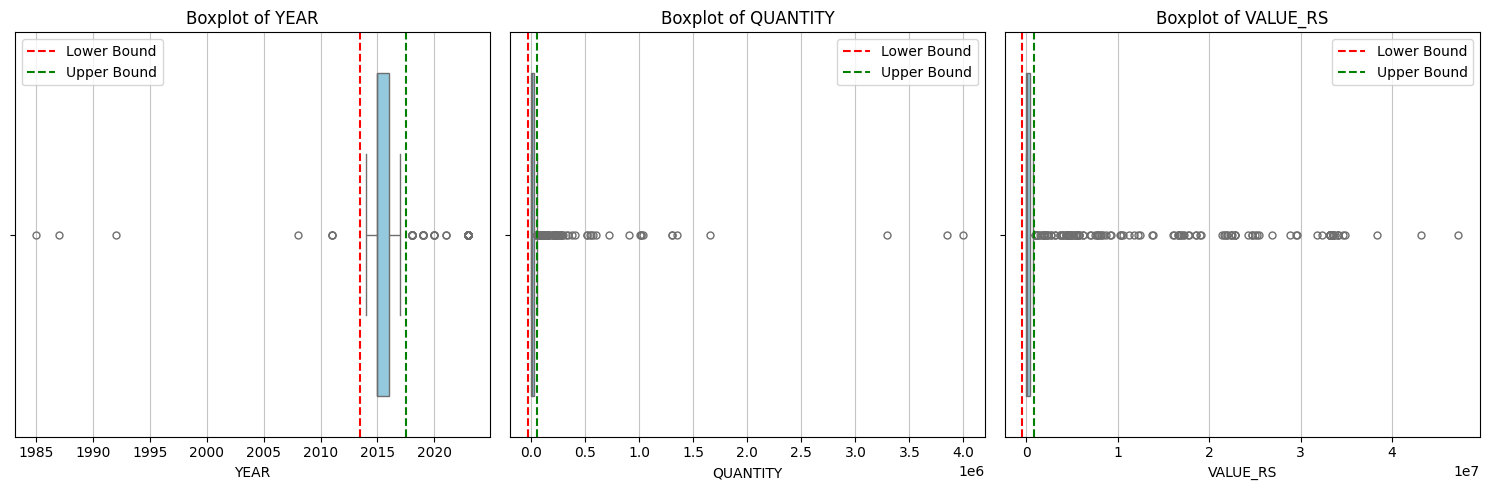

In [659]:
# Visualizing the outliers
# Calculating the number of rows and columns based on the number of numerical columns
num_columns = len(numerical_features)
num_rows = int(np.ceil(num_columns / 3))

# Creating a figure and axes array for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plotting boxplots for each numerical column
for i, column in enumerate(numerical_features):
    ax = axes[i]

    # Calculating IQR and bounds
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plotting the boxplot
    sns.boxplot(x=data[column], color='skyblue', flierprops=dict(marker='o', color='red', markersize=5), ax=ax)
    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    ax.legend()
    ax.grid(axis='x', alpha=0.75)


for i in range(num_columns, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [660]:
# Function to handle outliers by capping
def handle_outliers(data, method='cap'):
    for column in data.columns:
        if column == 'YEAR':
            lower_bound, upper_bound = -0.86, 0.50
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

        elif column == 'QUANTITY':
            lower_bound, upper_bound = -0.31, 0.03
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

        elif column == 'VALUE_RS':
            lower_bound, upper_bound = -0.39, -0.19
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

    return data


# Applying the function to handle outliers
data_cleaned = handle_outliers(data.copy(), method='cap')

# Displaying the cleaned dataset
print(data_cleaned.head())

   IMPORTER  YEAR  MONTH  HSCODE  COUNTRY  UNIT  QUANTITY  VALUE_RS  \
0         3   0.5    4.0       0        2     2      0.03     -0.19   
1         4   0.5    4.0       0       16     2      0.03     -0.19   
2         4   0.5    4.0       0       24     2      0.03     -0.19   
3         2   0.5    3.0       0        2     2      0.03     -0.19   
4         4   0.5    3.0       0       16     2      0.03     -0.19   

   DESCRIPTION_01  DESCRIPTION_02 DESCRIPTION_03  ENCODED_DESCRIPTION_03  
0               1               3       Chlorine                       2  
1               1               3       Chlorine                       2  
2               1               3       Chlorine                       2  
3               1               3       Chlorine                       2  
4               1               3       Chlorine                       2  


## **Handling the Multicollinearity in the dataset**

In [661]:
# Step 16: Handling the multicollinearity in the numerical columns

# Computing the correlation for numerical features
correlation_matrix = data[numerical_features].corr()

# Displaying the correlation matrix
print(correlation_matrix)

              YEAR  QUANTITY  VALUE_RS
YEAR      1.000000 -0.406381  0.255802
QUANTITY -0.406381  1.000000  0.609191
VALUE_RS  0.255802  0.609191  1.000000


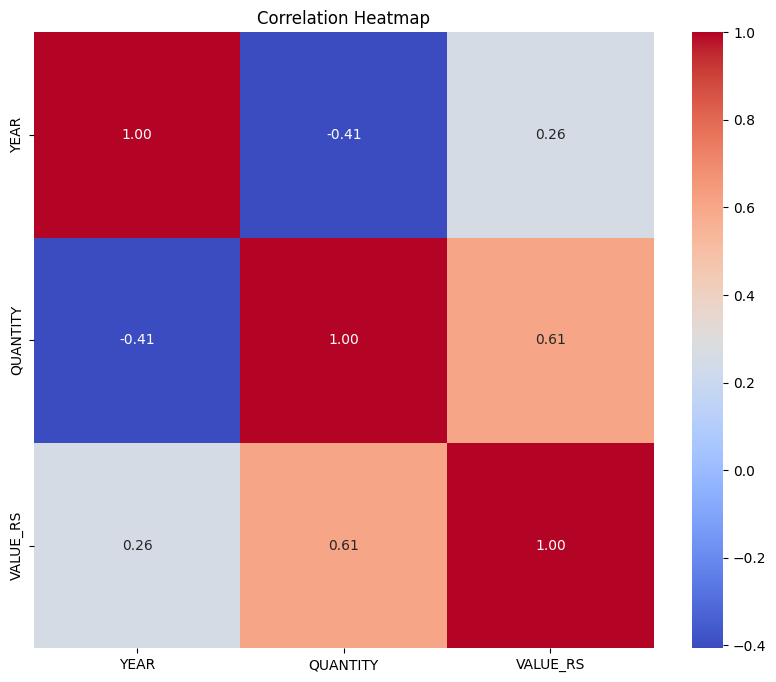

In [662]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**There is no visible multicollinearity among the numerical features in the dataset**

In [663]:
# Displaying dataset information
print("Dataset information:")
print(data.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IMPORTER                1042 non-null   int64  
 1   YEAR                    1042 non-null   int64  
 2   MONTH                   1042 non-null   float64
 3   HSCODE                  1042 non-null   int64  
 4   COUNTRY                 1042 non-null   int64  
 5   UNIT                    1042 non-null   int64  
 6   QUANTITY                1042 non-null   float64
 7   VALUE_RS                1042 non-null   float64
 8   DESCRIPTION_01          1042 non-null   int64  
 9   DESCRIPTION_02          1042 non-null   int64  
 10  DESCRIPTION_03          1042 non-null   object 
 11  ENCODED_DESCRIPTION_03  1042 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 97.8+ KB
None


## **The Target Column**

### **Assigning the Target Variable**

In [664]:
# Step 17: Assignining the Target Variable

# Risk mapping for DESCRIPTION_03
# risk_mapping = {
#    'Chlorine': 'Low',
#    'Nitric acid; sulphonitric acids': 'High',
#    'Cyanides and cyanide oxides: of sodium': 'High',
#    'Cyanides and cyanide oxides: other': 'High',
#    'Hydrogen peroxide, whether or not solidified with urea': 'High',
#    'Iodine': 'Low',
#    'Bromine': 'Low',
#    'Chlorates and perchlorates; bromates and perbromates; iodates and periodates': 'High',
#    'Mineral or chemical fertilizers, nitrogenous': 'Low',
#    'Sulphuric acid; oleum': 'High',
#    'Halides and halide oxides of non metals': 'Low',
#    'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts': 'Low'
#}

# Define quantity thresholds
# high_quantity_threshold = 10000

# Function to calculate risk
# def calculate_risk(description, quantity):
#    description_risk = risk_mapping.get(description.lower(), 'Low')
#    if description_risk == 'High' or quantity > high_quantity_threshold:
#        return 'High'
#    else:
#        return 'Low'

# Applying the function
# data['RISK'] = data.apply(
#    lambda row: calculate_risk(row['DESCRIPTION_03'], row['QUANTITY']),
#    axis=1
#)

In [665]:
# Risk mapping (High-risk chemicals)
high_risk_chemicals = {
    'Nitric acid; sulphonitric acids',
    'Cyanides and cyanide oxides: of sodium',
    'cyanides and cyanide oxides: other',
    'hydrogen peroxide, whether or not solidified with urea',
    'chlorates and perchlorates; bromates and perbromates; iodates and periodates',
    'sulphuric acid; oleum'
}

# Quantity threshold for risk classification
high_quantity_threshold = 10000

# Function to determine if an importation is risky or not
def classify_risk(description, quantity):
    if description.lower() in high_risk_chemicals or quantity > high_quantity_threshold:
        return 'Risky'
    return 'Not Risky'

# Apply function to data
data['RISK'] = data.apply(
    lambda row: classify_risk(row['DESCRIPTION_03'], row['QUANTITY']),
    axis=1
)

## **Visualizing the Target Variable**

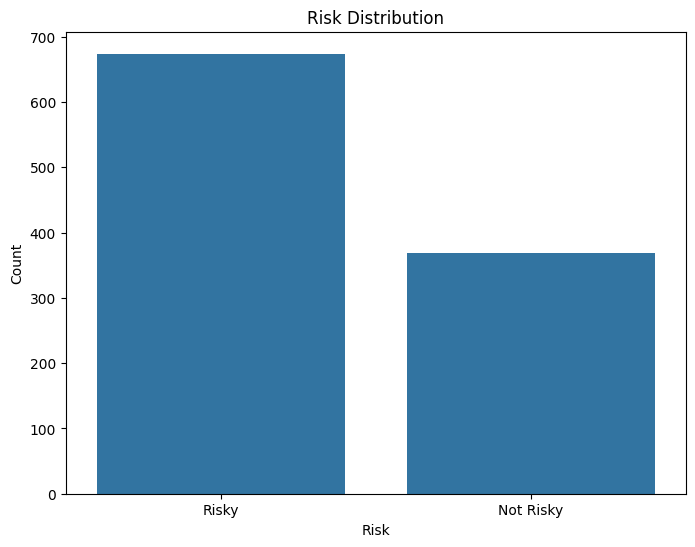

In [666]:
# Visualizing the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='RISK', data=data)
plt.title('Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.show()

In [667]:
# Step 18: Encoding the 'DESCRIPTION_03' column with label encoder and dropping the 'ENCODED_DESCRIPTION_03' column
label_encoder = LabelEncoder()
data['DESCRIPTION_03'] = label_encoder.fit_transform(data['DESCRIPTION_03'])
data.drop(columns=['ENCODED_DESCRIPTION_03'], inplace=True)

In [668]:
# Step 19: Encoding the 'RISK' variable
label_encoder = LabelEncoder()
data['RISK'] = label_encoder.fit_transform(data['RISK'])

In [669]:
# Step 20: Scaling the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [670]:
# Step 21: Splitting features and target
X = data.drop(columns=['RISK'])
y = data['RISK']

In [671]:
# Step 22: Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [672]:
# Analyzing the distribution of the y train dataset
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 293
Value: 1, Count: 540


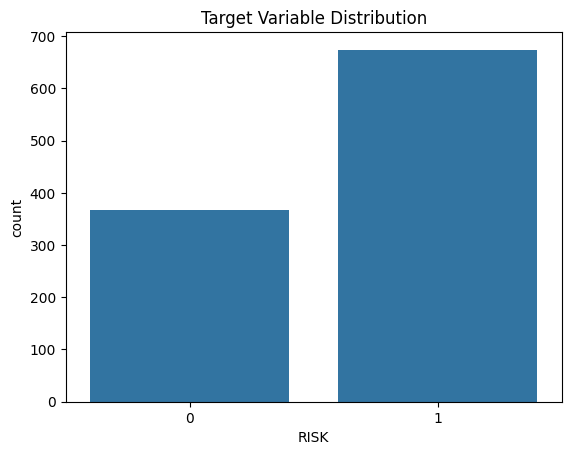

In [673]:
# Visualizing the distribution of the target variable
sns.countplot(data=data, x='RISK')
plt.title('Target Variable Distribution')
plt.show()

In [674]:
# Displaying the dataset shape
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (833, 11)
Shape of y_train: (833,)


In [675]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   int64  
 1   YEAR            1042 non-null   float64
 2   MONTH           1042 non-null   float64
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1042 non-null   int64  
 5   UNIT            1042 non-null   int64  
 6   QUANTITY        1042 non-null   float64
 7   VALUE_RS        1042 non-null   float64
 8   DESCRIPTION_01  1042 non-null   int64  
 9   DESCRIPTION_02  1042 non-null   int64  
 10  DESCRIPTION_03  1042 non-null   int64  
 11  RISK            1042 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 97.8 KB
None


In [676]:
# Display dataset information
print("Dataset Information:")
print(data.head)

Dataset Information:
<bound method NDFrame.head of       IMPORTER      YEAR  MONTH  HSCODE  COUNTRY  UNIT      QUANTITY  \
0            3  2.379968    4.0       0        2     2  3.798307e-01   
1            4  2.379968    4.0       0       16     2 -1.966288e-02   
2            4  2.379968    4.0       0       24     2 -1.291616e-01   
3            2  2.379968    3.0       0        2     2 -7.332619e-02   
4            4  2.379968    3.0       0       16     2  1.413228e-01   
...        ...       ...    ...     ...      ...   ...           ...   
1037         2 -0.349350   12.0      75       36     2 -1.116571e-01   
1038         2 -0.349350   12.0      75       36     2 -1.116571e-01   
1039         2 -0.349350   12.0      78       44     2 -3.098826e-17   
1040         2 -0.349350   12.0      78       44     2 -3.098826e-17   
1041         2 -0.349350   12.0      75       36     2 -1.116571e-01   

      VALUE_RS  DESCRIPTION_01  DESCRIPTION_02  DESCRIPTION_03  RISK  
0     1.73380

## **Balancing the Target Variable**

In [677]:
# Handling the imbalance dataset

# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)

Original dataset size: (1042, 11)
Resampled dataset size: (1348, 11)


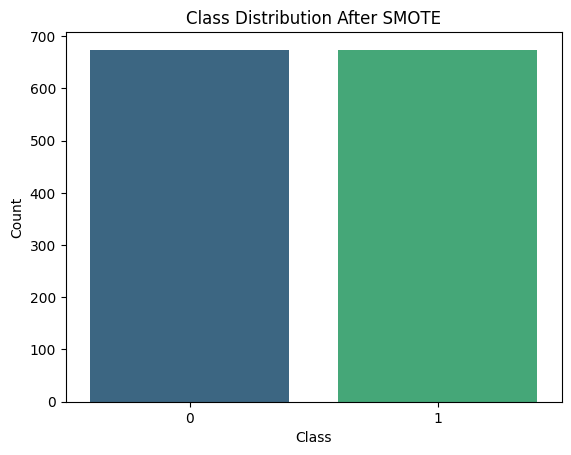

In [678]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [679]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

Shape of X_resampled: (1348, 11)
Shape of y_resampled: (1348,)


In [680]:
# Saving the preprocessed data
data.to_csv('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/preprocessed_data.csv', index=False)

In [681]:
# Standardizing the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [682]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [683]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   int64  
 1   YEAR            1042 non-null   float64
 2   MONTH           1042 non-null   float64
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1042 non-null   int64  
 5   UNIT            1042 non-null   int64  
 6   QUANTITY        1042 non-null   float64
 7   VALUE_RS        1042 non-null   float64
 8   DESCRIPTION_01  1042 non-null   int64  
 9   DESCRIPTION_02  1042 non-null   int64  
 10  DESCRIPTION_03  1042 non-null   int64  
 11  RISK            1042 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 97.8 KB
None


# **Building the Model**

## **Model based on LSTM and Gradient Boost**

In [684]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [685]:
# Splitting the data into training (60%) and temporary (40%) sets
X_train_scaled, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)

# Splitting the temporary set into validation (50% of temp, i.e., 20% of total) and test (50% of temp, i.e., 20% of total)
X_val_scaled, X_test_scaled, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [686]:
# Standard scaling for the splits
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_val_scaled = scaler.transform(X_val_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

In [687]:
# Setting a global seed for reproducibility
def set_seed(seed_value=42):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Defining the LSTM model
def create_lstm_model(input_shape, seed_value=42):
    # Setting the seed before building the model
    set_seed(seed_value)

    model = Sequential()
    model.add(LSTM(units=64, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [688]:
# Reshaping input data for LSTM (3D input required: samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_val_lstm = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Creating and train the LSTM model
lstm_model = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_val_lstm, y_val))

# Extracting LSTM features (use LSTM's output as features for Gradient Boosting)
lstm_train_features = lstm_model.predict(X_train_lstm)
lstm_val_features = lstm_model.predict(X_val_lstm)
lstm_test_features = lstm_model.predict(X_test_lstm)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5117 - val_loss: 0.3313
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2955 - val_loss: 0.2036
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2019 - val_loss: 0.1720
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1780 - val_loss: 0.1583
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1702 - val_loss: 0.1471
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1653 - val_loss: 0.1396
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1605 - val_loss: 0.1339
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1598 - val_loss: 0.1302
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1553 - val_loss: 0.1263
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1541 - val_loss: 0.1249
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1465 - val_loss: 0.1219
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1462 - val_loss: 0.1182

In [689]:
# Reshape features for Gradient Boosting
lstm_train_features = lstm_train_features.reshape(-1, 1)
lstm_val_features = lstm_val_features.reshape(-1, 1)
lstm_test_features = lstm_test_features.reshape(-1, 1)

In [690]:
# Hyperparameter tuning for Gradient Boosting using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Grid search cross-validation for Gradient Boosting
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(lstm_train_features, y_train)

# Best parameters from grid search
print("Best Parameters for Gradient Boosting: ", grid_search.best_params_)

# Train Gradient Boosting on the best parameters
gb_model_class = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Gradient Boosting:  {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [691]:
# Cross-validation on Gradient Boosting
cv_scores = cross_val_score(gb_model_class, lstm_train_features, y_train, cv=StratifiedKFold(5), scoring='accuracy')
print(f"Cross-validation Accuracy: {np.mean(cv_scores)} ± {np.std(cv_scores)}")

Cross-validation Accuracy: 0.9503999999999999 ± 0.019855477833585357


In [692]:
# Predicting on test data
y_pred_class = gb_model_class.predict(lstm_test_features)

# Evaluation for classification
print("\nClassification Evaluation:")
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))


Classification Evaluation:
Accuracy:  0.9425837320574163
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        74
           1       0.98      0.93      0.95       135

    accuracy                           0.94       209
   macro avg       0.93      0.95      0.94       209
weighted avg       0.95      0.94      0.94       209



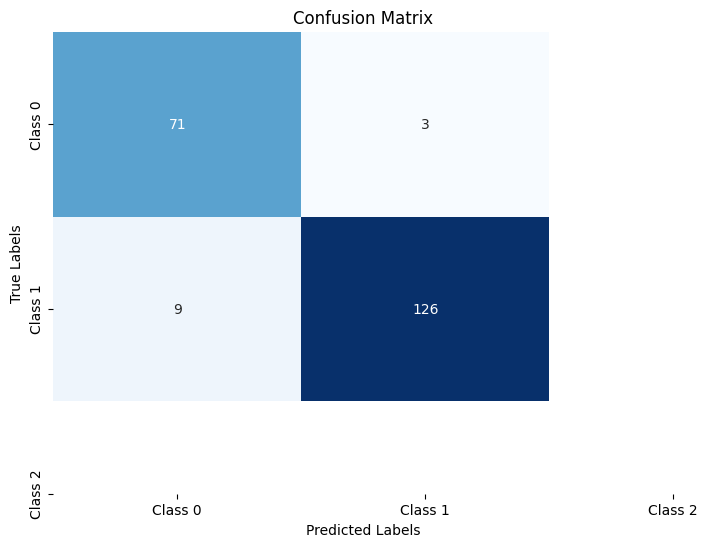

In [693]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [694]:
# Overfitting Score: Train vs Test Accuracy
y_pred_train = gb_model_class.predict(lstm_train_features)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: ", train_accuracy)

y_pred_test = gb_model_class.predict(lstm_test_features)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: ", test_accuracy)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("The model might be overfitting. Consider regularization, reducing model complexity, or adding more data.")
else:
    print("The model has balanced performance on train and test sets.")

Train Accuracy:  0.9728
Test Accuracy:  0.9425837320574163
The model has balanced performance on train and test sets.


In [695]:
# Saving Scaler
joblib.dump(scaler, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler.pkl')

# Saving LSTM Model
lstm_model.save('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/lstm_model.h5')

# Saving Gradient Boosting Model
joblib.dump(gb_model_class, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/gb_model_class.pkl')

print("Models saved successfully!")

Models saved successfully!


In [696]:
# Loading the Scaler
scaler = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler.pkl')

# Loading the LSTM Model
lstm_model = load_model('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/lstm_model.h5')

# Loading the Gradient Boosting Model
gb_model_class = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/gb_model_class.pkl')

# **Model Prediction**

In [720]:
import numpy as np
import joblib
from keras.models import load_model

# Load saved encoders
importer_encoder = joblib.load('encoded_IMPORTER.pkl')
description_01_encoder = joblib.load('encoded_DESCRIPTION_01.pkl')
description_02_encoder = joblib.load('encoded_DESCRIPTION_02.pkl')
description_03_encoder = joblib.load('encoded_DESCRIPTION_03.pkl')
hscode_encoder = joblib.load('encoded_HSCODE.pkl')
month_encoder = joblib.load('encoded_MONTH.pkl')
country_encoder = joblib.load('encoded_COUNTRY.pkl')
unit_encoder = joblib.load('encoded_UNIT.pkl')

# Predefined list of descriptions considered "risky"
risky_descriptions = {
    "Nitric acid; sulphonitric acids",
    "Hydrogen peroxide, whether or not solidified with urea",
    "Chlorates and perchlorates; bromates and perbromates; iodates and periodates",
    "Mineral or chemical fertilizers, nitrogenous",
    "Sulphuric acid; oleum",
    "Halides and halide oxides of non metals",
    "Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts",
    "Iodine",
    "Chlorine",
    "Cyanides and cyanide oxides : Other",
    "Cyanides and cyanide oxides : Of sodium",
    "Bromine"
}

# Function to encode the inputs
def encode_inputs(importer, month, country, unit, year, hscode, description, quantity, value):
    try:
        # Encode categorical features
        importer_encoded = importer_encoder.transform([importer])[0] if importer in importer_encoder.classes_ else -1
        month_encoded = month_encoder.transform([month])[0] if month in month_encoder.classes_ else -1
        country_encoded = country_encoder.transform([country])[0] if country in country_encoder.classes_ else -1
        unit_encoded = unit_encoder.transform([unit])[0] if unit in unit_encoder.classes_ else -1
        description_01_encoded = description_01_encoder.transform([description])[0] if description in description_01_encoder.classes_ else -1
        description_02_encoded = description_02_encoder.transform([description])[0] if description in description_02_encoder.classes_ else -1
        description_03_encoded = description_03_encoder.transform([description])[0] if description in description_03_encoder.classes_ else -1
        hscode_encoded = hscode
        value_encoded = value

        # Return the features as a 1D array of 9 features (instead of 11)
        return np.array([
            importer_encoded, month_encoded, country_encoded, unit_encoded, year, hscode_encoded,
            description_01_encoded, description_02_encoded, description_03_encoded, quantity, value_encoded
        ]).reshape(1, -1)
    except Exception as e:
        raise ValueError(f"Encoding failed: {e}")

# Function to determine risk category based on quantity
def calculate_risk(quantity):
    return 'High' if quantity >= 10000 else 'Low'

# Main function
def main():
    try:
        # Take user inputs for all fields
        importer = input("Enter importer: ").strip().capitalize()
        year = int(input("Enter year: ").strip())
        month = input("Enter month: ").strip().capitalize()
        country = input("Enter country: ").strip().upper()
        description = input("Enter description: ").strip().capitalize()
        quantity = float(input("Enter quantity: ").strip())
        value = float(input("Enter value: ").strip())
        hscode = int(input("Enter HS code: ").strip())
        unit = input("Enter unit: ").strip().upper()

        # Validate inputs
        if not all([importer, year, month, country, description, quantity, value, hscode, unit]):
            print("Error: Missing required inputs")
            return

        # Check if description is in the "risky" list
        if description in risky_descriptions:
            print("Classification: Risky (Predefined hazardous description)")
            print(f"Risk Category: {'High' if quantity >= 10000 else 'Low'}")
            return

        # Encode inputs
        features = encode_inputs(importer, month, country, unit, year, hscode, description, quantity, value)

        # Prepare LSTM input format
        features_lstm = features.reshape(1, 1, -1)

        # LSTM feature extraction
        lstm_features = lstm_model.predict(features_lstm)
        lstm_features = lstm_features.reshape(1, -1)

        # Risk classification using Gradient Boosting
        prediction_prob = gb_model_class.predict_proba(lstm_features)[0, 1]
        classification = 'risky' if prediction_prob >= 0.5 else 'not risky'

        # Display classification
        print(f"Classification: {classification}")

        # Perform risk categorization only if classification is 'risky'
        if classification == 'risky':
            risk_category = calculate_risk(quantity)
            print(f"Risk Category: {risk_category}")
        else:
            print("Risk categorization is unnecessary (not risky).")

    except Exception as e:
        print(f"Error: {e}")

# Run the script
if __name__ == "__main__":
    main()

Enter importer: Shabna Inc
Enter year: 2019
Enter month: JUNE
Enter country: HOLAND
Enter description: Nitric acid
Enter quantity: 2000000000
Enter value: 2000000000000000
Enter HS code: 2808
Enter unit: KG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Classification: risky
Risk Category: High
